In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [6]:
scaler = MinMaxScaler()

In [ ]:
#excluindo nulos e renomeando algumas colunas do dataset    
caminho_arquivo = './data/data.xlsx'
df = pd.read_excel(caminho_arquivo)
df = df.rename(columns={'Unnamed: 1': 'DRS', 'Unnamed: 3': 'GVE', 'Unnamed: 4': 'Codigo_regiao', 'Unnamed: 5': 'Regiao', 'Unnamed: 6': 'Municipio'})
df = df.dropna()
df['Municipio'] = df['Municipio'].replace(to_replace=r'\d', value='', regex=True)
semana = 1

In [9]:
#renomeando as colunas do dataset
for i in range(7, 60):
    if i == 59:
        df = df.rename(columns={f'Unnamed: {i}': 'Total'})
    else:
        df = df.rename(columns={f'Unnamed: {i}': semana})
        semana += 1

In [10]:
linha_sp = df.loc[df['Regiao'] == 'SÃO PAULO']
semanas_infectados = pd.DataFrame()

In [15]:
N = 11451245 #população de são paulo
gama = 1/6 # média de dias para recuperar-se da dengue

for i in range(1, 53):
    semanas_infectados[i] = linha_sp[i]

In [18]:
#definir arrays de infectados sucetíveis e recuperados
semanas = semanas_infectados.columns.tolist()
infectados = np.array(semanas_infectados.values.tolist()).flatten().tolist()
sucetiveis = [N-infectados[0]]
recuperados = [0]
contador = 0
contador_elementos = 2
numero_par_semanas = 26
beta_array = []

In [21]:
#Rodar modelo sir nos dados para simular o histórico da doença
while contador < 26:
    y = []
    X = []
    for i in range(contador_elementos - 2, contador_elementos):
        y.append(semanas[i])
        X.append(infectados[i])
    X = np.array(X).reshape(-1,1)
    y = np.array(y)
    modelo = LinearRegression()
    modelo.fit(X, y)
    b = modelo.coef_[0]
    beta = b +  gama
    beta_array.append(beta)
    for i in range(contador_elementos - 2, contador_elementos):
        if(len(sucetiveis) < 52 and len(recuperados) < 52):
            sucetiveis.append(sucetiveis[i]*(1-beta*infectados[i]/N))
            recuperados.append(recuperados[i]+gama*infectados[i])
    contador_elementos += 2
    contador += 1

In [27]:
#Normalizando os dados para melhor visualização no gráfico
valores_sucetiveis_normalizados = scaler.fit_transform([[v] for v in sucetiveis])
valores_infectados_normalizados = scaler.fit_transform([[v] for v in infectados])
valores_recuperados_normalizados = scaler.fit_transform([[v] for v in recuperados])

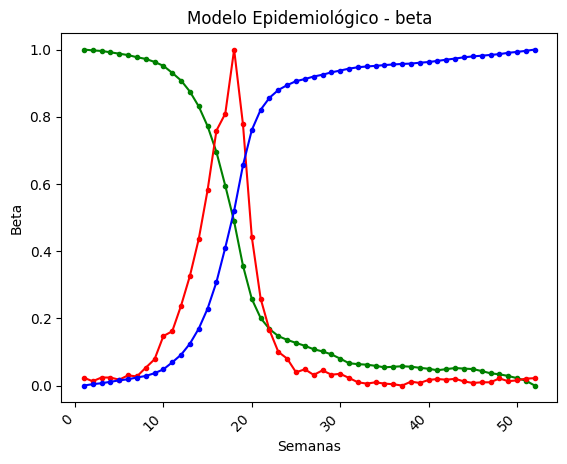

In [29]:
#Gráfico das linhas do modelo SIR
plt.plot(semanas, valores_sucetiveis_normalizados, label="Sucetíveis", color='green', marker='.')
plt.plot(semanas, valores_infectados_normalizados, label="Infectados", color='red', marker='.')
plt.plot(semanas, valores_recuperados_normalizados, label="Recuperados", color='blue', marker='.')
plt.xlabel('Semanas')
plt.ylabel('Beta')
plt.title('Modelo Epidemiológico - beta')
plt.xticks(rotation=45, ha='right')
mplcursors.cursor(hover=True)